<a class="anchor" id="0"></a>
# **AISC2007 - Deep Learning - Case Study 1 - Group E**

<!DOCTYPE html>
<html>
<head>
  <title align='center'>Group E MECE Table</title>
   <style>
    /* CSS rule for center-aligning the title */
    title {
      text-align: center;
    }
    /* CSS rules for the table styling */
    table {
      border-collapse: collapse;
      width: 100%;
    }
    th, td {
      text-align: left;
      padding: 8px;
      border-bottom: 2px solid #000;
      border-right: 2px solid #000;
    }
    th {
      background-color: #f2f2f2;
      border-right: 2px solid #000;
    }
    td:last-child, th:last-child {
      border-right: none;
    }
  </style>
</head>
<body>
  <table>
    <tr>
      <th>S.NO</th>
      <th>Name</th>
      <th>Tasks</th>
      <th>Descriptions</th>
    </tr>
    <tr>
      <td>1 </td>
      <td>Harsha</td>
      <td>Fune Tunning of CNN model</td>
      <td>Learned how to work with pretrained models and used to train with our data. Used data augmentation and trained with VGG16 pretarained model.</td>
    </tr>
    <tr>
      <td>2 </td>
      <td>Amber</td>
      <td>Fine tuning DNN model</td>
      <td>Did Fine Tuning for ANN -added layers+ Changed Optimizer + Reduced Epochs, Changed Verbose =1</td>
    </tr>
    <tr>
      <td>3 </td>
      <td>Kumar Dahal</td>
      <td>Model Interopability for CNN model</td>
      <td>Learned how LIME module works and how to apply it to the models trained with images and applied it on pretrained model VGG16 used in Fine Tuning.</td>
    </tr>
     <tr>
      <td>4 </td>
      <td>Abhishek Singh</td>
      <td>Model Interopability for DNN model</td>
      <td>Used LIME for interpreting a DNN model trained on COVID-19 X-ray images.<br>
      Challenge: Faced issues with model input shape mismatch and incorrect number of samples for explanation.<br>
      Resolution: Addressed shape mismatch by resizing images and normalized pixel values.</td>
    </tr>
    <tr>
      <td>5 </td>
      <td>Gowtham</td>
      <td>Data Preprocessing for CNN model</td>
      <td>Worked with images on extracting to the new folders based on class and type of image X-Ray and lung mask images. Appled Gussian Blur, Historgram equilization and applied contrast. Divided the data into train, valiation and test. Created the required datasets using data augmentation.</td>
    </tr>
    <tr>
      <td>6 </td>
      <td>Srinivasateja</td>
      <td>Data Preprocessing for DNN model/td>
      <td>Created the for images extract from ZIP file and seperated the images accroding to it's image labels. Divied the data into train, validation and test using sklearn library.</td>
    </tr>
    <tr>
      <td>7 </td>
      <td>Snehalatha</td>
      <td>Image Analysis</td>
      <td>Perfromed the analysis of the image dataset.</td>
    </tr>
    <tr>
      <td>8 </td>
      <td>Jai Doshi</td>
      <td>Model Building using DNN</td>
      <td>Created DNN model for image data and given the image data and performed the cross validation using the DNN model.</td>
    </tr>
    <tr>
      <td>9 </td>
      <td>Girish Sai Thiruvidhula</td>
      <td>Model Building using CNN and Fine Tuning for CNN model(Other than pretrained model)</td>
      <td>Created the 4 CNN models with X-Ray images with and without data augmentation and lung masks with and with out data aungmentation.Worked on fine tuning the model having the input data augmented data.</td>
    </tr>
  </table>
</body>
</html>


NOTE : This file contains the preprocessing,model building, fune-tuning, and model evaluation for CNN models only.
There is another file for the details regarding the the DNN model but MECE tabel details are same in both the files.

## **Importing Libraries**

In [118]:
from glob import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import splitfolders
import tensorflow_addons as tfa
import shutil
#import the required libraries for visualization
import os
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#LimeImageExplainer is  an instance of the LIME responsible for generating explaination for image being classified
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import zipfile

# Path to the ZIP file
zip_file_path = 'CovidXRayImages.zip'

# Destination directory where the contents will be extracted
extract_to_dir = 'Extracted_CovidXRayImages'

# Open the ZIP file for reading
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the destination directory
    zip_ref.extractall(extract_to_dir)

print("ZIP file extracted successfully.")


ZIP file extracted successfully.


In [3]:
# Displaying the folder hierarchy
for root, dirs, files in os.walk(extract_to_dir):
        print("Directory:", root)

Directory: Extracted_CovidXRayImages
Directory: Extracted_CovidXRayImages\Val
Directory: Extracted_CovidXRayImages\Val\COVID-19
Directory: Extracted_CovidXRayImages\Val\COVID-19\images
Directory: Extracted_CovidXRayImages\Val\COVID-19\lung masks
Directory: Extracted_CovidXRayImages\Val\Non-COVID
Directory: Extracted_CovidXRayImages\Val\Non-COVID\images
Directory: Extracted_CovidXRayImages\Val\Non-COVID\lung masks
Directory: Extracted_CovidXRayImages\Val\Normal
Directory: Extracted_CovidXRayImages\Val\Normal\images
Directory: Extracted_CovidXRayImages\Val\Normal\lung masks


## **Image Analysis**

In [4]:
# function to load the images from the directory
def load_images_from_folder(folder, mask=False):
    images_list = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Load the image in grayscale mode if it is a mask
        if mask:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        else:
            img = cv2.imread(img_path)
        if img is not None:
            images_list.append(img)
    return images_list

In [5]:
# directory path
dataset_dir = extract_to_dir + "\Val"

# subfolders path
categories = ['Normal', 'Non-COVID', 'COVID-19']

# lists to hold images, masks, and labels
images = []
masks = []
labels = []

# Loading the images, masks, and labels
for i, category in enumerate(categories):
    # Path to the images and lung masks folders
    images_path = os.path.join(dataset_dir, category, 'images')
    masks_path = os.path.join(dataset_dir, category, 'lung masks')
    
    # Loading images and masks
    category_images = load_images_from_folder(images_path)
    category_masks = load_images_from_folder(masks_path, mask=True)
    
    # Appending to the lists
    images.extend(category_images)
    masks.extend(category_masks)
    # Creating a label for each image
    labels.extend([i] * len(category_images))  

# Converting lists to numpy arrays
images = np.array(images)
masks = np.array(masks)
labels = np.array(labels)

print(len(images),len(masks),len(labels))

5417 5417 5417


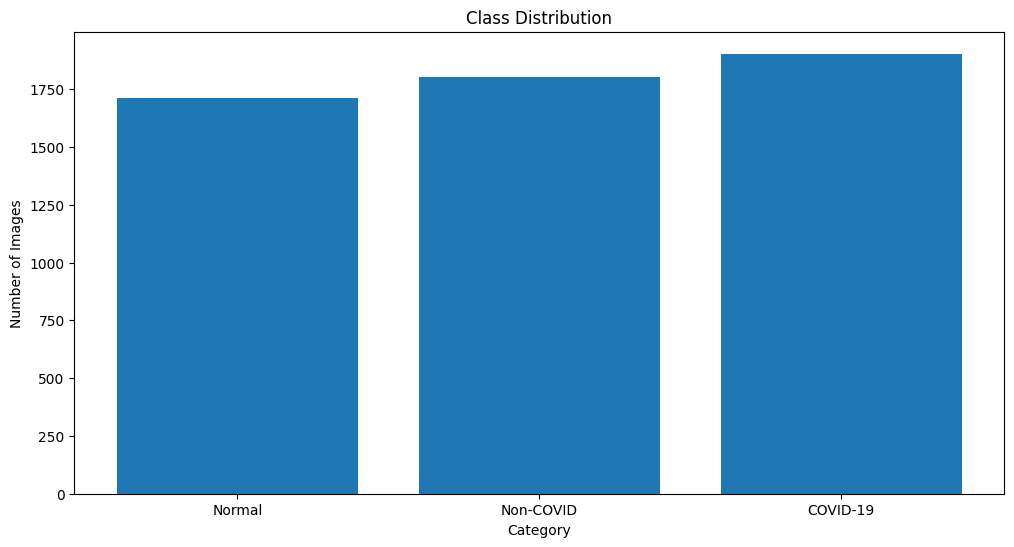

In [6]:
plt.rcParams["figure.figsize"] = (12, 6)

# Checking the class distributions
unique, counts = np.unique(labels, return_counts=True)
plt.bar(categories, counts)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

The dataset is categorized into 3 distinct groups: Normal, Non-COVID, and COVID-19. There are more number of covid-19 images followed by non-covid and normal categories

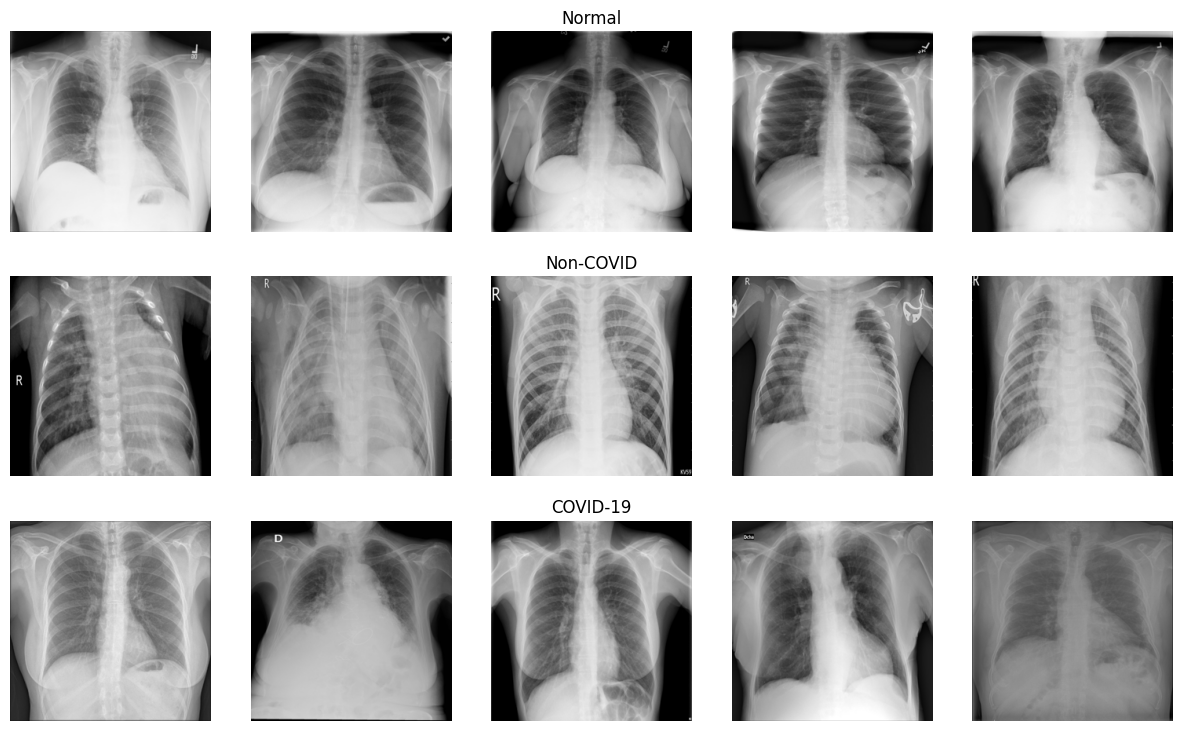

In [7]:
# Visualizing sample images
fig, axs = plt.subplots(3, 5, figsize=(15, 9))  # Adjust the size as needed
for i, category in enumerate(categories):
    idxs = np.where(labels == i)[0][:5]  # Get the first five indices of each category
    for j, idx in enumerate(idxs):
        axs[i, j].imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        axs[i, j].axis('off')
    axs[i, 2].set_title(category)
plt.show()

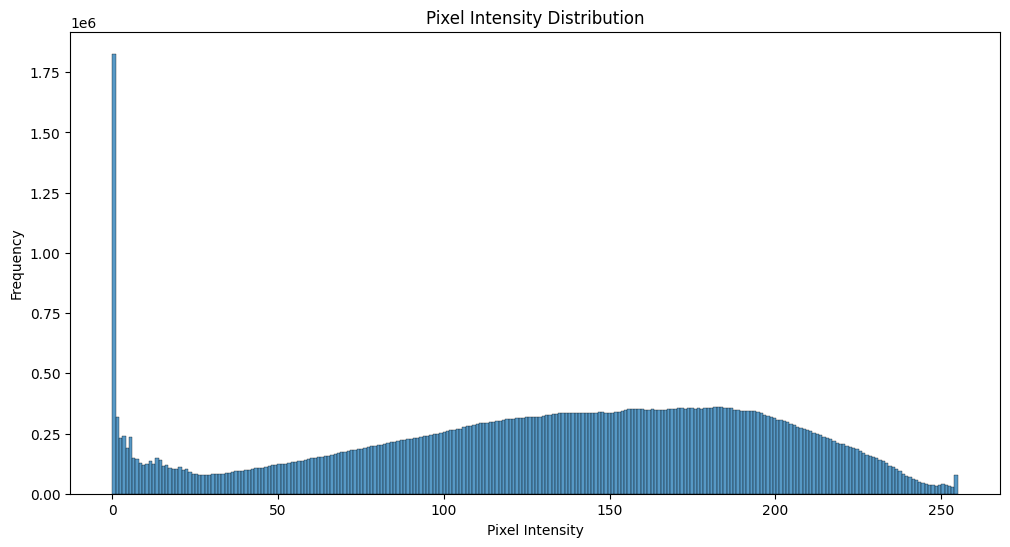

In [8]:
# Pixel intensity distribution
sampled_images = images[np.random.choice(images.shape[0], 300, replace=False)]
pixel_values = sampled_images.ravel()
sns.histplot(pixel_values, bins=256, kde=False)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

x-axis represents the pixel intensity where 0 represents black and 255 represents white. Above histogram shows that there is a very high frequency of pixels with low-intensity values..
So the images have fewer bright areas and a significant amount of very dark areas.

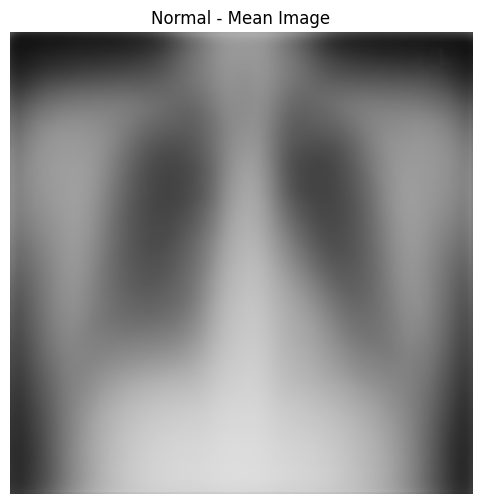

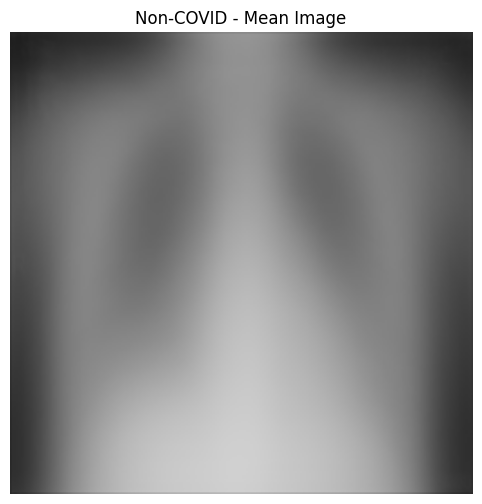

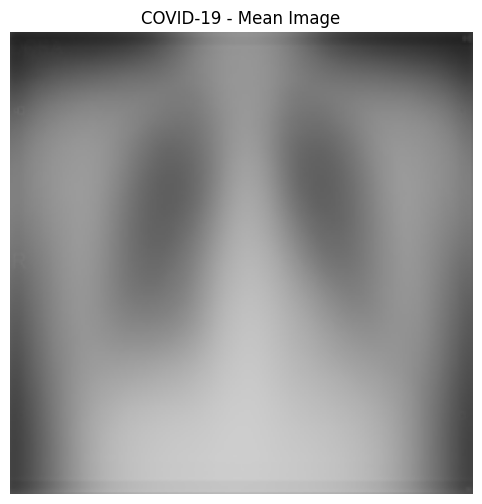

In [9]:
# Mean Image
for i, category in enumerate(categories):
    category_images = images[labels == i]
    mean_image = np.mean(category_images, axis=0)
    plt.imshow(cv2.cvtColor(mean_image.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.title(f'{category} - Mean Image')
    plt.axis('off')
    plt.show()

* The Normal lung X-ray shows clear, healthy lung fields. 
* The Non-COVID image is more opaque, indicating diverse lung abnormalities. 
* The COVID-19 image reveals diffuse haziness. 

In [10]:
# Analyzing the shapes of images
image_shapes = [img.shape for img in images]
mask_shapes = [mask.shape for mask in masks]

# unique shapes
unique_image_shapes = set(image_shapes)
unique_mask_shapes = set(mask_shapes)

# Checking if all images and masks are of the same size
if len(unique_image_shapes) == 1:
    print(f"All images are of the same size:{unique_image_shapes.pop()}")
else:
    print(f"Images are of varying sizes:{unique_image_shapes}")

if len(unique_mask_shapes) == 1:
    print(f"All masks are of the same size:{unique_mask_shapes.pop()}")
else:
    print(f"Masks are of varying sizes:{unique_mask_shapes}")

All images are of the same size:(256, 256, 3)
All masks are of the same size:(256, 256)


Since there is a uniformity in dimensions the images are consistent. Resizing would be needed if there are any memory constraints.

## **Data Pre processing**

* Creating the folders for x-ray images and lung mask images seperately and move them to the respective class images.

In [11]:
os.makedirs(extract_to_dir + '/xray_images', exist_ok = True)
os.makedirs(extract_to_dir + '/xray_images/' + categories[0], exist_ok = True)
os.makedirs(extract_to_dir + '/xray_images/' + categories[1], exist_ok = True)
os.makedirs(extract_to_dir + '/xray_images/' + categories[2], exist_ok = True)
os.makedirs(extract_to_dir + '/xray_lung_mask_images', exist_ok = True)
os.makedirs(extract_to_dir + '/xray_lung_mask_images/' + categories[0], exist_ok = True)
os.makedirs(extract_to_dir + '/xray_lung_mask_images/' + categories[1], exist_ok = True)
os.makedirs(extract_to_dir + '/xray_lung_mask_images/' + categories[2], exist_ok = True)

In [12]:
import glob # need to access images to transfer between different folders
def image_transfer(src_dir,dst_dir):
    for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
        shutil.copy(jpgfile, dst_dir)

In [13]:
# copying images from src_dir to dst_dir of respective categories
image_transfer(extract_to_dir + '/Val/' + categories[0] + '/images',extract_to_dir + '/xray_images/' + categories[0])
image_transfer(extract_to_dir + '/Val/' + categories[1] + '/images',extract_to_dir + '/xray_images/' + categories[1])
image_transfer(extract_to_dir + '/Val/' + categories[2]+ '/images',extract_to_dir + '/xray_images/' + categories[2])
image_transfer(extract_to_dir + '/Val/' + categories[0] + '/lung masks',extract_to_dir + '/xray_lung_mask_images/' + categories[0])
image_transfer(extract_to_dir + '/Val/' + categories[1] + '/lung masks',extract_to_dir + '/xray_lung_mask_images/' + categories[1])
image_transfer(extract_to_dir + '/Val/' + categories[2]+ '/lung masks',extract_to_dir + '/xray_lung_mask_images/' + categories[2])

In [14]:
# displaying if all the class x-ray images have been moved to respective folders or not
for root, dirs, files in os.walk(extract_to_dir + '/xray_images/'):
        # Print the current directory
        print("Directory:", root)

Directory: Extracted_CovidXRayImages/xray_images/
Directory: Extracted_CovidXRayImages/xray_images/COVID-19
Directory: Extracted_CovidXRayImages/xray_images/Non-COVID
Directory: Extracted_CovidXRayImages/xray_images/Normal


In [15]:
# displaying if all the class lung mask images have been moved to respective folders or not
for root, dirs, files in os.walk(extract_to_dir + '/xray_lung_mask_images/'):
        # Print the current directory
        print("Directory:", root)

Directory: Extracted_CovidXRayImages/xray_lung_mask_images/
Directory: Extracted_CovidXRayImages/xray_lung_mask_images/COVID-19
Directory: Extracted_CovidXRayImages/xray_lung_mask_images/Non-COVID
Directory: Extracted_CovidXRayImages/xray_lung_mask_images/Normal


In [16]:
# Define train, validation and test ratios
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2

## **Splitting the images into TRAIN,VALIDATION and TEST folders**

In [17]:
if os.path.exists('./xray_images_output'):
    print("Images slpit already done!")
    for root, dirs, files in os.walk('./xray_images_output/'):
        # Print the current directory
        print("Directory:", root)
else:
    print("Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is in progress...")
    splitfolders.ratio(extract_to_dir + '/xray_images', output="xray_images_output", seed=1337, ratio=(TRAIN_RATIO, VALIDATION_RATIO,TEST_RATIO))
    print("Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is completed.")
    

Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is in progress...


Copying files: 5417 files [00:35, 153.13 files/s]

Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is completed.


In [18]:
if os.path.exists('./xray_lung_mask_images_output'):
    print("Images slpit already done!")
    for root, dirs, files in os.walk('./xray_lung_mask_images_output/'):
        # Print the current directory
        print("Directory:", root)
else:
    print("Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is in progress...")
    splitfolders.ratio(extract_to_dir + '/xray_lung_mask_images', output="xray_lung_mask_images_output", seed=1337, ratio=(TRAIN_RATIO, VALIDATION_RATIO,TEST_RATIO))
    print("Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is completed.")
    

Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is in progress...


Copying files: 5417 files [00:33, 162.19 files/s]

Splitting lung mask image data into separate TRAIN , VALIDATION and TEST is completed.


In [19]:
# Defining the output directory for train, validation and test
imgPath = "./xray_images_output"
testPath = imgPath + "/test"
test_dir = os.listdir(testPath)
trainPath = imgPath + "/train"
train_dir = os.listdir(trainPath)
valPath = imgPath + "/val"
val_dir = os.listdir(valPath)

In [20]:
# Label creation
class_labels = {0: 'COVID-19', 1: 'Non-COVID', 2: 'Normal'}
print(class_labels)

{0: 'COVID-19', 1: 'Non-COVID', 2: 'Normal'}


In [21]:
from glob import glob # for accessing the images of all the folders and sub folders
def imagesPerClass(filePath):
    total_images = []
    for fPath in os.listdir(filePath):
        print("The images in {} dataset for the class {} : {}".format(filePath,fPath,len(glob(filePath + "/" + fPath + "/*.png"))))
        total_images.append(len(glob(filePath + "/" + fPath + "/*.png")))
    print("Total number of images in {} directory : {}".format(filePath,sum(total_images)))

In [22]:
print("-----------------TRAIN DATA ----------------")
imagesPerClass(trainPath)
print("-----------------VALIDATION DATA ----------------")
imagesPerClass(valPath)
print("-----------------TEST DATA ----------------")
imagesPerClass(testPath)

-----------------TRAIN DATA ----------------
The images in ./xray_images_output/train dataset for the class COVID-19 : 1141
The images in ./xray_images_output/train dataset for the class Non-COVID : 1081
The images in ./xray_images_output/train dataset for the class Normal : 1027
Total number of images in ./xray_images_output/train directory : 3249
-----------------VALIDATION DATA ----------------
The images in ./xray_images_output/val dataset for the class COVID-19 : 380
The images in ./xray_images_output/val dataset for the class Non-COVID : 360
The images in ./xray_images_output/val dataset for the class Normal : 342
Total number of images in ./xray_images_output/val directory : 1082
-----------------TEST DATA ----------------
The images in ./xray_images_output/test dataset for the class COVID-19 : 382
The images in ./xray_images_output/test dataset for the class Non-COVID : 361
The images in ./xray_images_output/test dataset for the class Normal : 343
Total number of images in ./xr

In [23]:
# function to display images in 3*3 matrix format
def displayImageTF(dataset):
    dataset_iterator = dataset.as_numpy_iterator()
    data_batch = dataset_iterator.next()
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
    for i in range(3):  
        for j in range(3):  
            index = i * 3 + j  
            ax[i, j].imshow(data_batch[0][index].astype(int))
            ax[i, j].set_title(class_labels[data_batch[1][index]])
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

## **Reading the X-ray images from Training,Validation and Testing directories**

In [24]:
train_data = tf.keras.utils.image_dataset_from_directory(trainPath,
                                                         labels='inferred',
                                                         label_mode='int',
                                                         color_mode='rgb',
                                                         batch_size=32,
                                                         image_size=(32, 32)
                                                         )
val_data = tf.keras.utils.image_dataset_from_directory(valPath,
                                                       labels='inferred',
                                                       label_mode='int',
                                                       color_mode='rgb',
                                                       batch_size=32,
                                                       image_size=(32, 32)
                                                       )
test_data = tf.keras.utils.image_dataset_from_directory(testPath,
                                                        labels='inferred',
                                                        label_mode='int',
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        image_size=(32, 32)
                                                        )

Found 3249 files belonging to 3 classes.


Found 1082 files belonging to 3 classes.
Found 1086 files belonging to 3 classes.


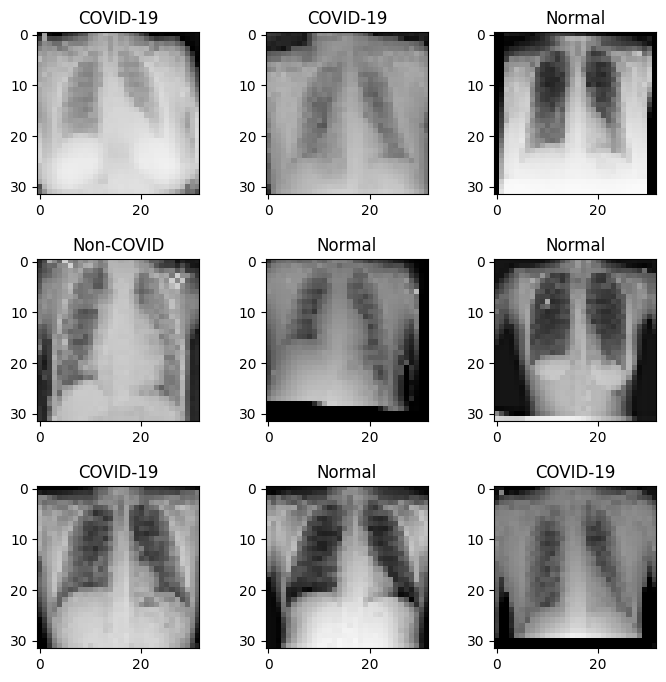

In [25]:
displayImageTF(train_data)

In [26]:
train_norm_data=train_data.map(lambda x,y:(x/255,y))
val_norm_data=val_data.map(lambda x,y:(x/255,y))

## **Image Augmentation for X-ray images**

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory(trainPath,
                                                  target_size=(32, 32),
                                                  color_mode='rgb', 
                                                  class_mode='sparse', 
                                                  batch_size=50,
                                                  )

test_dataset = test_datagen.flow_from_directory(testPath,
                                                target_size=(32, 32),
                                                class_mode='sparse',
                                                color_mode='rgb',
                                                batch_size=50,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory(valPath,
                                                  target_size=(32, 32),
                                                  class_mode='sparse',
                                                  batch_size=50,
                                                  color_mode='rgb',
                                                  )

Found 3249 images belonging to 3 classes.
Found 1086 images belonging to 3 classes.
Found 1082 images belonging to 3 classes.


## **Tensor Image Data for Lung Mask Images**

In [28]:
img_LM_Path = "./xray_lung_mask_images_output"
testPathLM = img_LM_Path + "/test"
test_dirLM = os.listdir(testPathLM)
trainPathLM = img_LM_Path + "/train"
train_dirLM = os.listdir(trainPathLM)
valPathLM = img_LM_Path + "/val"
val_dirLM = os.listdir(valPathLM)

In [ ]:
train_dataLM = tf.keras.utils.image_dataset_from_directory(trainPathLM,
                                                         labels='inferred',
                                                         label_mode='int',
                                                         color_mode='rgb',
                                                         batch_size=32,
                                                         image_size=(32, 32)
                                                         )
val_dataLM = tf.keras.utils.image_dataset_from_directory(valPathLM,
                                                       labels='inferred',
                                                       label_mode='int',
                                                       color_mode='rgb',
                                                       batch_size=32,
                                                       image_size=(32, 32)
                                                       )
test_dataLM = tf.keras.utils.image_dataset_from_directory(testPathLM,
                                                        labels='inferred',
                                                        label_mode='int',
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        image_size=(32, 32)
                                                        )

Found 3249 files belonging to 3 classes.
Found 1082 files belonging to 3 classes.
Found 1086 files belonging to 3 classes.


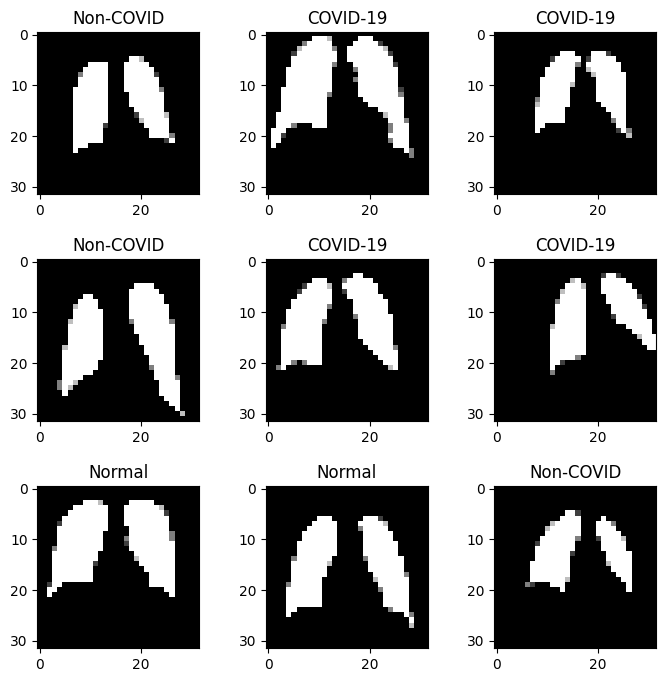

In [30]:
displayImageTF(test_dataLM)

In [31]:
train_norm_dataLM=train_dataLM.map(lambda x,y:(x/255,y))
val_norm_dataLM=val_dataLM.map(lambda x,y:(x/255,y))

In [32]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_LM_dataset = train_datagen.flow_from_directory(trainPathLM,
                                                  target_size=(32, 32),
                                                  color_mode='rgb', 
                                                  class_mode='sparse', 
                                                  batch_size=50,
                                                  )

test_LM_dataset = test_datagen.flow_from_directory(testPathLM,
                                                target_size=(32, 32),
                                                class_mode='sparse',
                                                color_mode='rgb',
                                                batch_size=50,
                                                shuffle=False
                                                )

valid_LM_dataset = valid_datagen.flow_from_directory(valPathLM,
                                                  target_size=(32, 32),
                                                  class_mode='sparse',
                                                  batch_size=50,
                                                  color_mode='rgb',
                                                  )

Found 3249 images belonging to 3 classes.
Found 1086 images belonging to 3 classes.


Found 1082 images belonging to 3 classes.


### **Applying Gaussian Blur, Histogram Equalization and adjusting blur to the images**

In [33]:
# Define preprocessing functions
def apply_filters_image(image, imageFilter):
    if imageFilter == "gaussian":
        # Apply Gaussian blur
        blurred_image = tfa.image.gaussian_filter2d(image, sigma=1.0)
        return blurred_image
    elif imageFilter == "histogram":
        # Apply histogram equalization
        equalized_image = tfa.image.equalize(image)
        return equalized_image
    elif imageFilter == "threshold":
        # Applying Histogram Equalization
        image_eq = tf.image.adjust_contrast(image, 0.5) 
        thresholded_image = tf.where(image < tf.reduce_mean(image_eq), 0, 255)
        return thresholded_image
    else:
        blurred_image = tfa.image.gaussian_filter2d(image, sigma=1.0)
        equalized_image = tfa.image.equalize(blurred_image)
        image_eq = tf.image.adjust_contrast(equalized_image, 0.5) 
        thresholded_image = tf.where(image_eq < tf.reduce_mean(image_eq), 0, 255)
        return thresholded_image

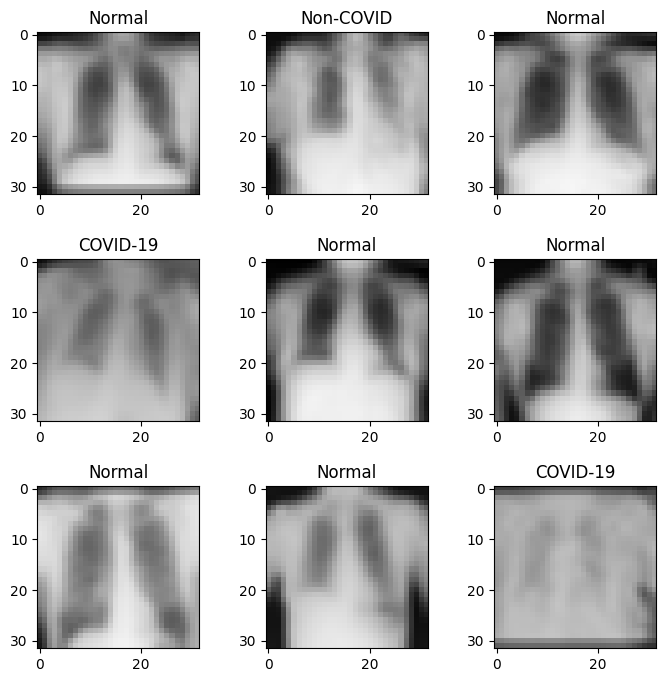

In [34]:
# Apply preprocessing functions to the training dataset
processed_blurred_train_dataset = train_data.map(
    lambda image, label: (apply_filters_image(image, "gaussian"), label)
)
displayImageTF(processed_blurred_train_dataset)

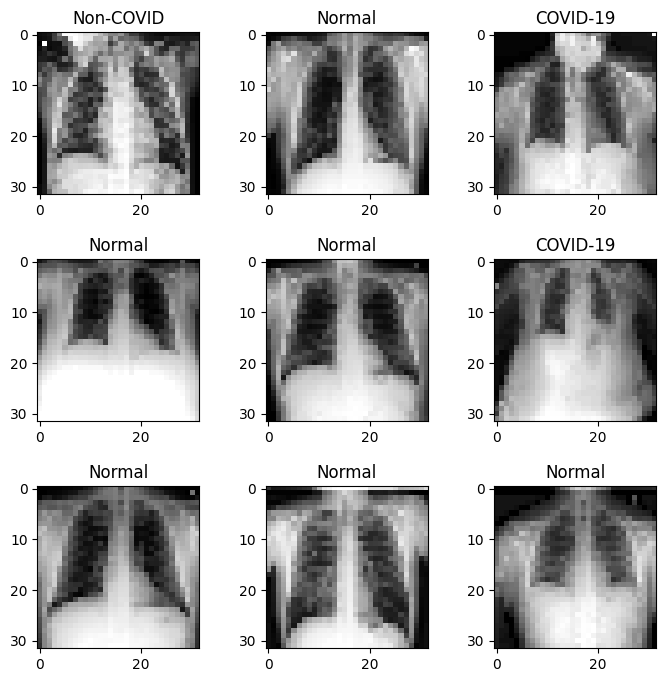

In [35]:
# Apply preprocessing functions to the training dataset
processed_equilized_train_dataset = train_data.map(
    lambda image, label: (apply_filters_image(image, "histogram"), label)
)
displayImageTF(processed_equilized_train_dataset)

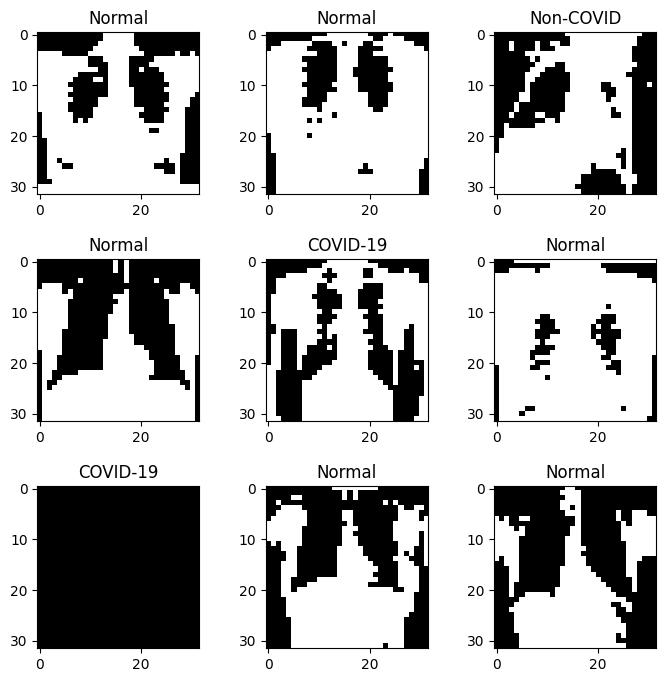

In [36]:
# Apply preprocessing functions to the training dataset
processed_thereshold_train_dataset = train_data.map(
    lambda image, label: (apply_filters_image(image, "threshold"), label)
)
displayImageTF(processed_thereshold_train_dataset)

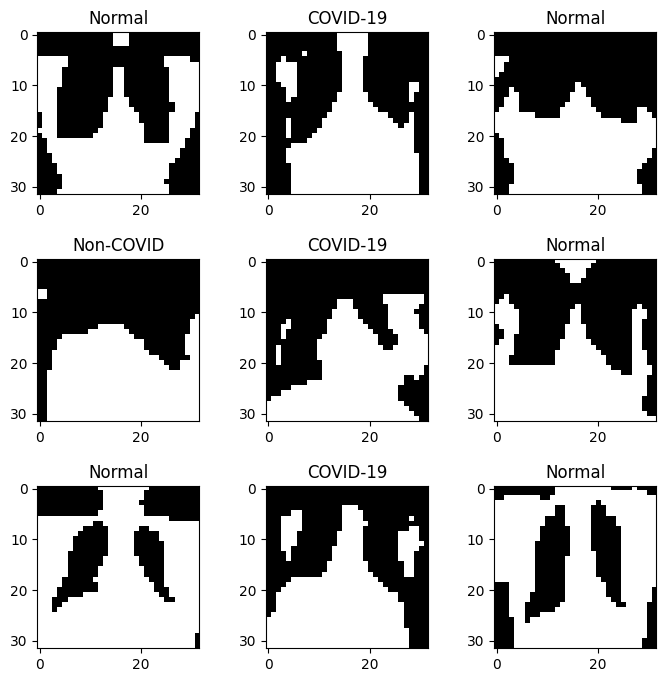

In [37]:
# Apply preprocessing functions to the training dataset
processed_thereshold_train_dataset = train_data.map(
    lambda image, label: (apply_filters_image(image, "custom"), label)
)
displayImageTF(processed_thereshold_train_dataset)

* From the above 3 filters, we can see that the gussian blur and histogram filters made small changes to the images but applying contrast either on the original image or the image on which blur and histogram are applied are making changes to images a lot and making the images unsuable.

## **Model Building**

### **Model Building using X-Ray Images**

In [38]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [39]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       18560     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [40]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#,keras.metrics.Precision(name='precision'),keras.metrics.Precision(name='recall')])


In [41]:
cnn_history = cnn_model.fit(
                 train_norm_data,
                 validation_data=val_norm_data,
                 epochs=10
                 )

Epoch 1/10


102/102 [==============================] - 10s 72ms/step - loss: 1.0120 - accuracy: 0.4623 - val_loss: 0.8990 - val_accuracy: 0.5702
Epoch 2/10
102/102 [==============================] - 4s 40ms/step - loss: 0.8565 - accuracy: 0.6113 - val_loss: 0.9201 - val_accuracy: 0.5841
Epoch 3/10
102/102 [==============================] - 5s 48ms/step - loss: 0.7650 - accuracy: 0.6596 - val_loss: 0.7548 - val_accuracy: 0.6784
Epoch 4/10
102/102 [==============================] - 5s 48ms/step - loss: 0.6886 - accuracy: 0.7033 - val_loss: 0.8010 - val_accuracy: 0.6571
Epoch 5/10
102/102 [==============================] - 5s 47ms/step - loss: 0.6170 - accuracy: 0.7458 - val_loss: 0.6318 - val_accuracy: 0.7542
Epoch 6/10
102/102 [==============================] - 6s 56ms/step - loss: 0.5466 - accuracy: 0.7713 - val_loss: 0.6093 - val_accuracy: 0.7671
Epoch 7/10
102/102 [==============================] - 6s 56ms/step - loss: 0.5107 - accuracy: 0.7947 - val_loss: 0.6201 - val_accuracy: 0.7505
Epoch 8/1

In [42]:
def plotAccuraccy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'b', label='Training acc : {}'.format(acc[-1]))
    plt.plot(epochs, val_acc, 'r', label='Validation acc : {}'.format(val_acc[-1]))
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

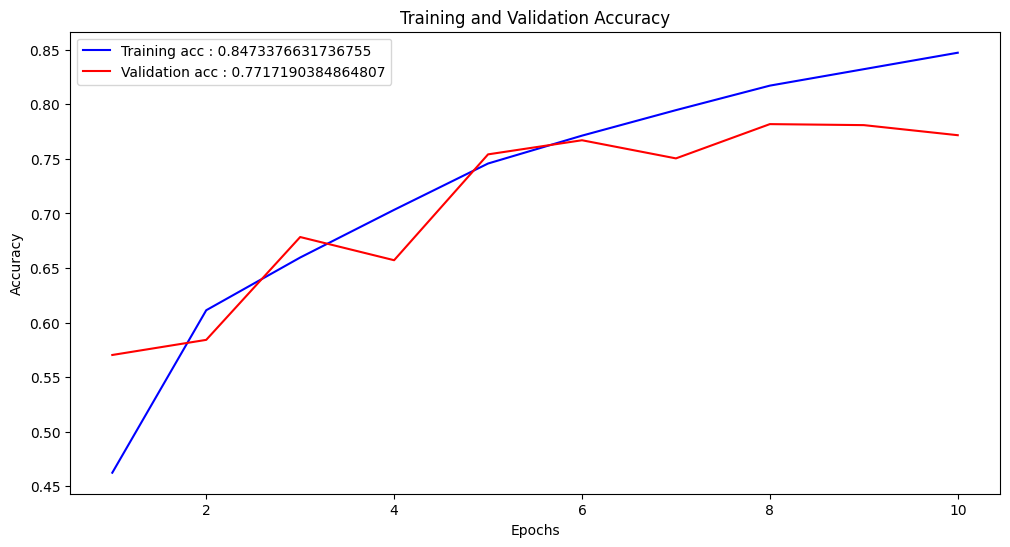

In [43]:
plotAccuraccy(cnn_history)

In [44]:
import cv2
def covidPredict(testImage, random_class):
    img = cv2.imread(testImage)
    plt.imshow(img)
    plt.show()
    resize = tf.image.resize(img, (32,32))
    yhat = cnn_model.predict(np.expand_dims(resize/255, 0))
    max_index = np.argmax(yhat)
    predicted_class = class_labels[max_index]
    print(predicted_class)
    print(random_class)
    if predicted_class == random_class:
        print("Our model predicted correctly")
    else:
        print("Model prediction output is wrong")

In [46]:
import random
random_test_class = random.choice(list(class_labels.values()))
print("Randomly picked class : {}".format(random_test_class))
test_images_dataset1 = glob(testPath + "/" + random_test_class + "/*.png")
random_test_image = random.choice(test_images_dataset1)
print("Randomly picking the image from TEST dataset of a class {} is {}".format(random_test_class,random_test_image))

Randomly picked class : Normal
Randomly picking the image from TEST dataset of a class Normal is ./xray_images_output/test/Normal\Normal (6651).png


In [47]:
remaining_items = categories[:]  # Make a copy of the original list
remaining_items.remove(random_test_class)  # Remove the item chosen in step 1
random_item_2 = random.choice(remaining_items)
print("Randomly chosen item in step 2 (excluding step 1 item):", random_item_2)
test_images_dataset2 = glob(testPath + "/" + random_item_2 + "/*.png")
random_test_image_2 = random.choice(test_images_dataset2)
print("Randomly picking the image from TEST dataset  not of a class {} is {}".format(random_test_class,random_test_image_2))

Randomly chosen item in step 2 (excluding step 1 item): Non-COVID
Randomly picking the image from TEST dataset  not of a class Normal is ./xray_images_output/test/Non-COVID\non_COVID (5938).png


Sending correct image  and correct class


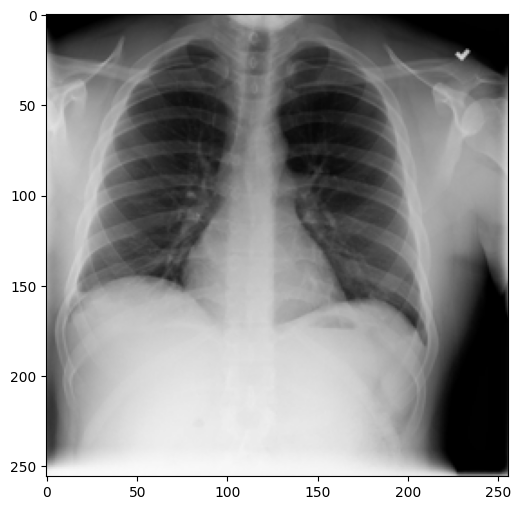

1/1 [==============================] - 0s 216ms/step
Normal
Normal
Our model predicted correctly
Sending wrong image  and wrong class


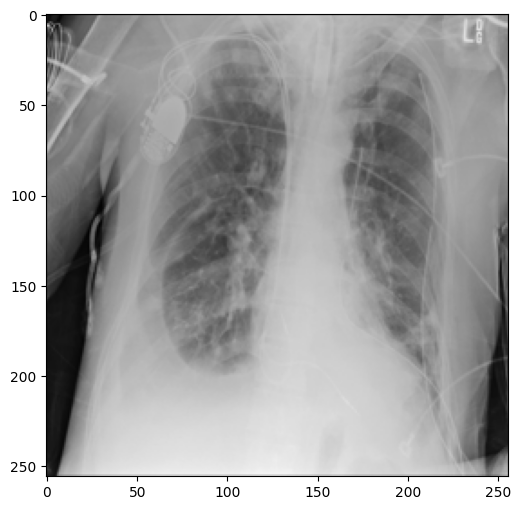

1/1 [==============================] - 0s 21ms/step
COVID-19
Normal
Model prediction output is wrong


In [48]:
print("============================================================")
print("Sending correct image  and correct class")
covidPredict(random_test_image,random_test_class)
print("============================================================")
print("Sending wrong image  and wrong class")
covidPredict(random_test_image_2,random_test_class)

In [49]:
predictions = cnn_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

34/34 [==============================] - 2s 34ms/step


In [50]:
y_true_cnn = []
for _, labels in test_data:
    y_true_cnn.extend(labels.numpy())

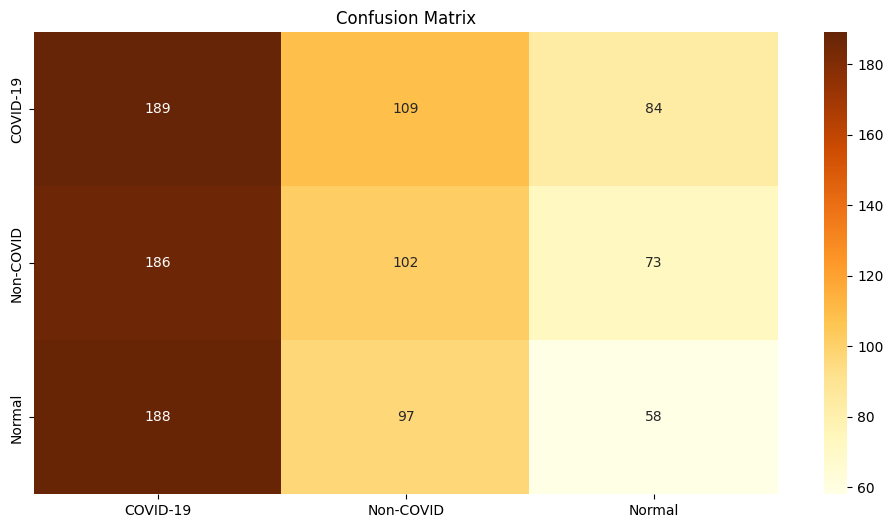

In [51]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_cnn, predicted_classes)

sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="YlOrBr", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix')
plt.show()

* From the above confusion matrix we can see that model predictions contians a lot of TN for the class COVID-19 but for the remaining classes it has a lot of Fals Negetives.

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plotROC_AUC(y_true_val, predicted_classes):
    # Convert labels to one-hot encoded format
    n_classes = 3  # The number of classes
    y_true = label_binarize(y_true_val, classes=range(n_classes))
    y_pred = label_binarize(predicted_classes, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves
    plt.figure()
    colors = ['b', 'g', 'r','y']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

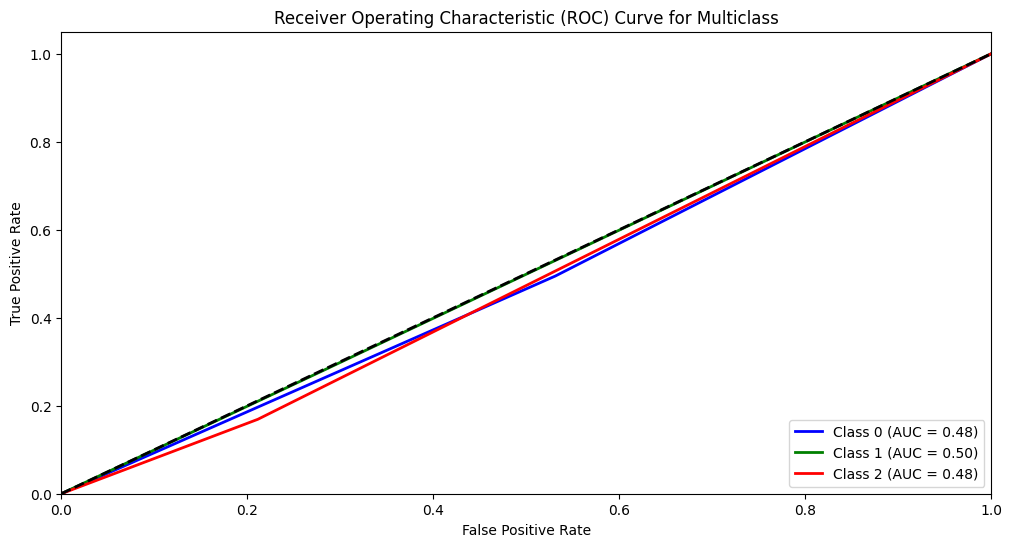

In [53]:
plotROC_AUC(y_true_cnn,predicted_classes)

* Eventhough we are getting the 90% accuracy but our model prediction is not good as we can see from the ROC AUC curve which is nearly 50%.

## **Model Building using augmented data for X-ray images**

In [54]:
cnn_model_DAG = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [55]:
cnn_model_DAG.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       18560     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [56]:
cnn_model_DAG.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
history_DAG = cnn_model_DAG.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=15,
                 )

Epoch 1/15
65/65 [==============================] - 13s 159ms/step - loss: 1.0437 - accuracy: 0.4143 - val_loss: 0.9417 - val_accuracy: 0.5425
Epoch 2/15
65/65 [==============================] - 10s 155ms/step - loss: 0.8664 - accuracy: 0.6036 - val_loss: 0.8300 - val_accuracy: 0.6331
Epoch 3/15
65/65 [==============================] - 9s 132ms/step - loss: 0.8312 - accuracy: 0.6113 - val_loss: 0.8218 - val_accuracy: 0.6349
Epoch 4/15
65/65 [==============================] - 9s 135ms/step - loss: 0.7625 - accuracy: 0.6617 - val_loss: 0.8141 - val_accuracy: 0.6571
Epoch 5/15
65/65 [==============================] - 10s 151ms/step - loss: 0.7015 - accuracy: 0.6990 - val_loss: 0.7241 - val_accuracy: 0.6904
Epoch 6/15
65/65 [==============================] - 10s 159ms/step - loss: 0.6239 - accuracy: 0.7421 - val_loss: 0.6233 - val_accuracy: 0.7634
Epoch 7/15
65/65 [==============================] - 10s 153ms/step - loss: 0.5459 - accuracy: 0.7775 - val_loss: 0.6733 - val_accuracy: 0.7200
E

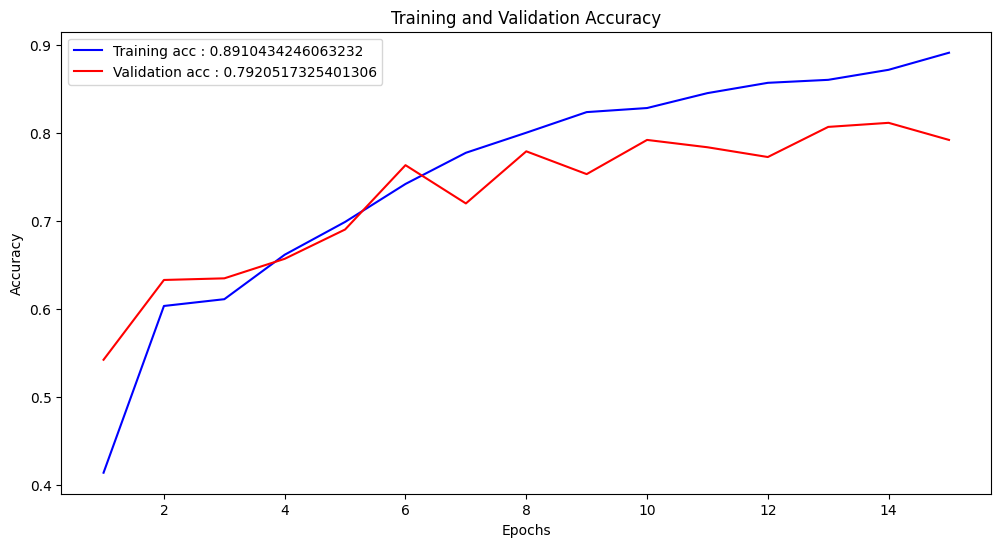

In [58]:
plotAccuraccy(history_DAG)

In [59]:
predictions_DAG = cnn_model_DAG.predict(test_dataset)
predicted_classes_DAG = np.argmax(predictions_DAG, axis=1)

22/22 [==============================] - 2s 83ms/step


In [60]:
y_true_DAG = test_dataset.labels

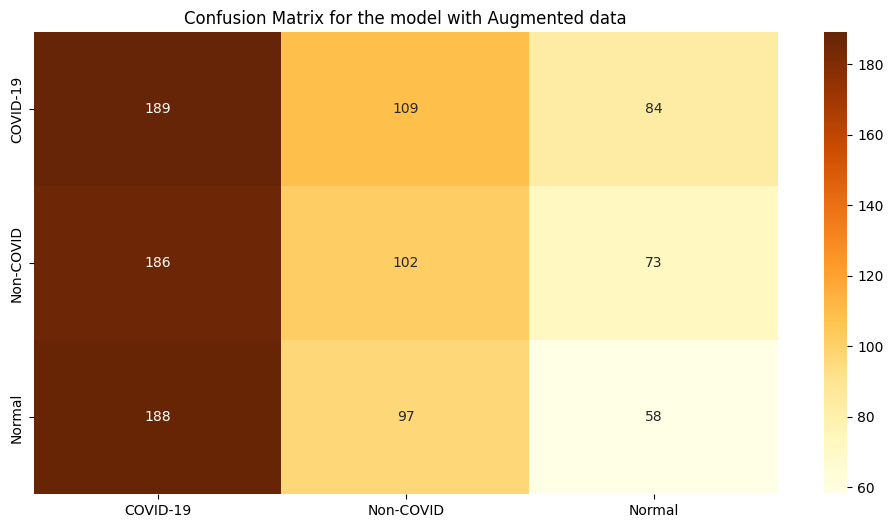

In [61]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix_DAG = confusion_matrix(y_true_DAG, predicted_classes_DAG)

sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="YlOrBr", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix for the model with Augmented data')
plt.show()

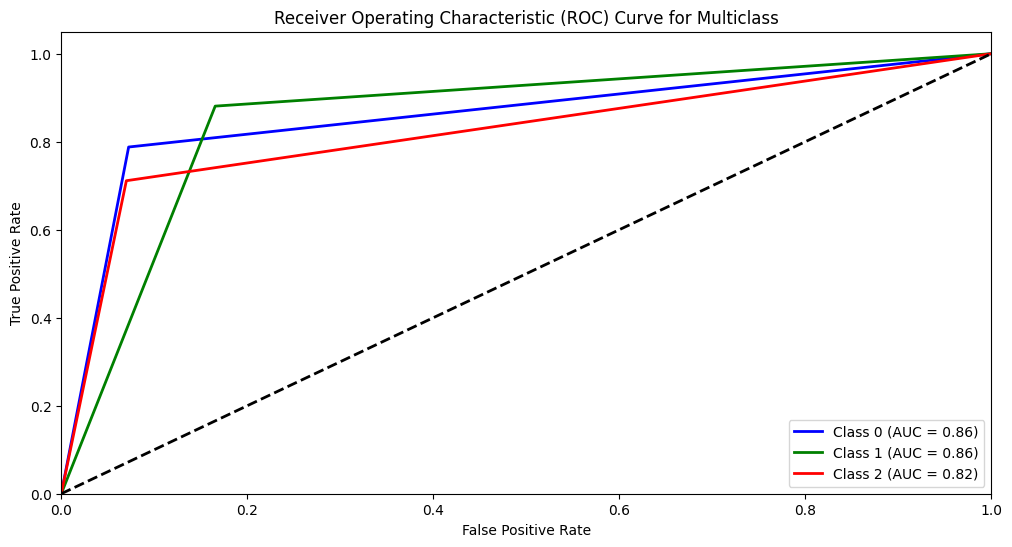

In [62]:
plotROC_AUC(y_true_DAG,predicted_classes_DAG)

* As we can see from the above plot, that the model TPr(True Positive Rate) for each class has increased using the data from Augmented dataset but the model is not doing that great beacuse in confusion matrix we can see that there are a lot of FN for class label other than COVID-19.

## **Model Building - Lung mask images**

In [63]:
cnn_model_LM = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [64]:
cnn_model_LM.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
cnn_model_LM_history = cnn_model_LM.fit(
                 train_norm_dataLM,
                 validation_data=val_norm_dataLM,
                 epochs=15,
                 )

Epoch 1/15
102/102 [==============================] - 11s 84ms/step - loss: 1.0551 - accuracy: 0.4241 - val_loss: 1.0031 - val_accuracy: 0.5046
Epoch 2/15
102/102 [==============================] - 4s 40ms/step - loss: 0.9442 - accuracy: 0.5334 - val_loss: 0.9594 - val_accuracy: 0.5647
Epoch 3/15
102/102 [==============================] - 4s 41ms/step - loss: 0.8841 - accuracy: 0.5682 - val_loss: 0.9544 - val_accuracy: 0.5555
Epoch 4/15
102/102 [==============================] - 4s 40ms/step - loss: 0.8504 - accuracy: 0.5928 - val_loss: 0.8830 - val_accuracy: 0.5739
Epoch 5/15
102/102 [==============================] - 4s 40ms/step - loss: 0.8164 - accuracy: 0.6147 - val_loss: 0.8522 - val_accuracy: 0.5970
Epoch 6/15
102/102 [==============================] - 4s 38ms/step - loss: 0.7815 - accuracy: 0.6347 - val_loss: 0.8312 - val_accuracy: 0.5989
Epoch 7/15
102/102 [==============================] - 4s 42ms/step - loss: 0.7384 - accuracy: 0.6627 - val_loss: 0.8906 - val_accuracy: 0.595

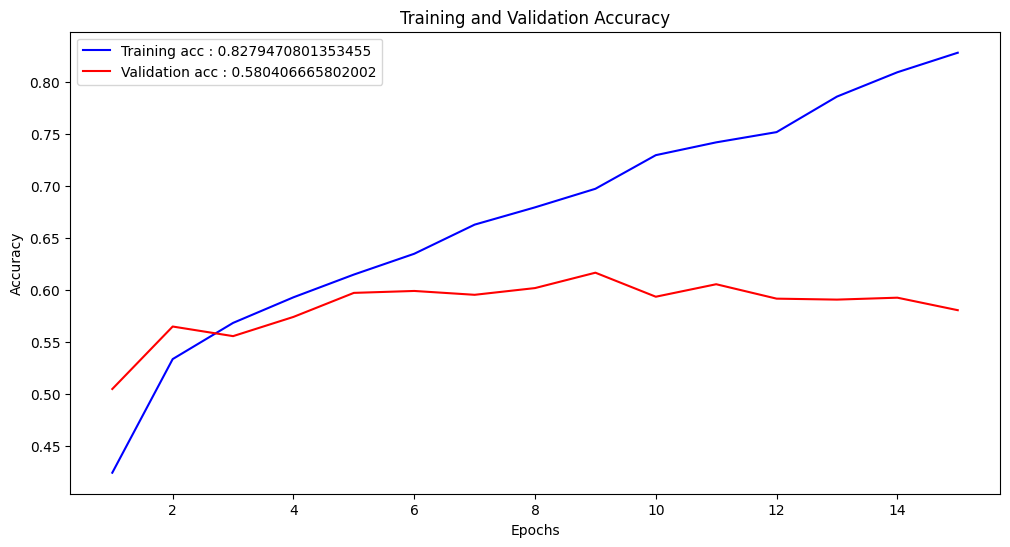

In [66]:
plotAccuraccy(cnn_model_LM_history)

* From the above accuracy plot , we can seet that the model with lung maks data is overfitting but with vey poor accuracy.

In [67]:
y_trueLM = []
for _, labels in test_dataLM:
    y_trueLM.extend(labels.numpy())

In [68]:
predictions_LM = cnn_model_LM.predict(test_dataset)
predicted_classes_LM = np.argmax(predictions_LM, axis=1)

22/22 [==============================] - 2s 84ms/step


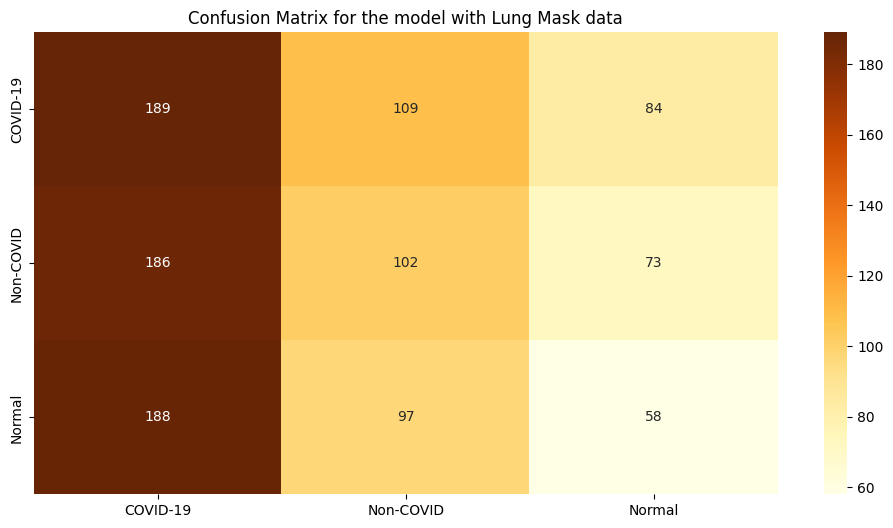

In [69]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix_LM = confusion_matrix(y_trueLM, predicted_classes_LM)

sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="YlOrBr", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix for the model with Lung Mask data')
plt.show()

* From the above plot, the confusion matrix we can see that there are a lot of FALSE Negatives and it is not classifying correclty.

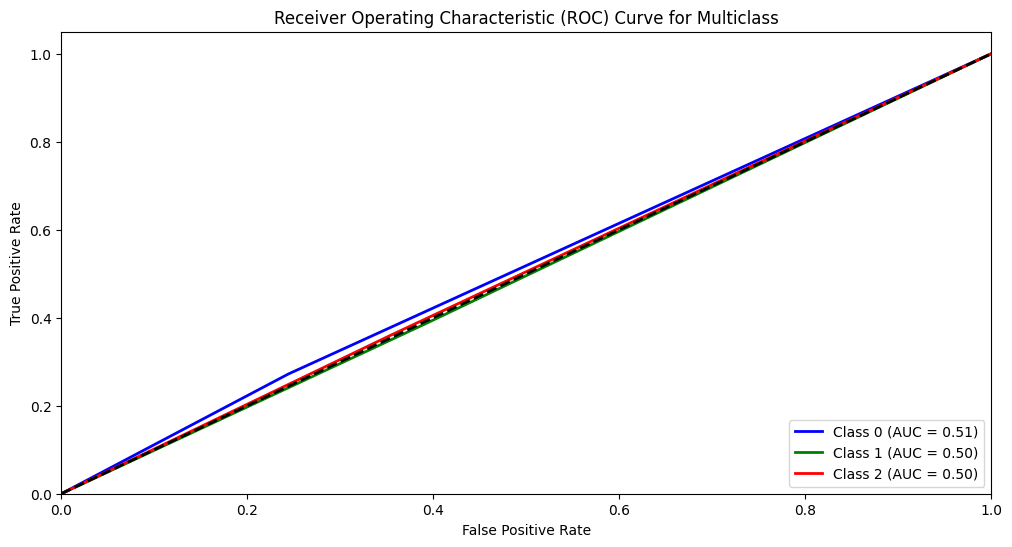

In [70]:
plotROC_AUC(y_trueLM, predicted_classes_LM)

* The model with lung masks as input is not classifying correclty with the 0.5 threshold in AUC ROC curve.Let's check that the model with lung masks with data augmentation.

## **Model Building for Lung Mask images with Augmented data**

In [71]:
cnn_LM_model_DAG = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
cnn_LM_model_DAG.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       18560     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 64)        

In [72]:
cnn_LM_model_DAG.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
cnn_model_LM_DAG_history = cnn_LM_model_DAG.fit(
                 train_LM_dataset,
                 validation_data=valid_LM_dataset,
                 epochs=15,
                 )

Epoch 1/15
65/65 [==============================] - 7s 69ms/step - loss: 1.0816 - accuracy: 0.4094 - val_loss: 1.0550 - val_accuracy: 0.4935
Epoch 2/15
65/65 [==============================] - 4s 62ms/step - loss: 0.9741 - accuracy: 0.5254 - val_loss: 0.9452 - val_accuracy: 0.5333
Epoch 3/15
65/65 [==============================] - 4s 59ms/step - loss: 0.8947 - accuracy: 0.5716 - val_loss: 0.9001 - val_accuracy: 0.5767
Epoch 4/15
65/65 [==============================] - 4s 61ms/step - loss: 0.8620 - accuracy: 0.5869 - val_loss: 0.9076 - val_accuracy: 0.5795
Epoch 5/15
65/65 [==============================] - 4s 59ms/step - loss: 0.8192 - accuracy: 0.6171 - val_loss: 0.8556 - val_accuracy: 0.6063
Epoch 6/15
65/65 [==============================] - 4s 57ms/step - loss: 0.7838 - accuracy: 0.6454 - val_loss: 0.8634 - val_accuracy: 0.5989
Epoch 7/15
65/65 [==============================] - 4s 60ms/step - loss: 0.7398 - accuracy: 0.6614 - val_loss: 0.8272 - val_accuracy: 0.6044
Epoch 8/15
65

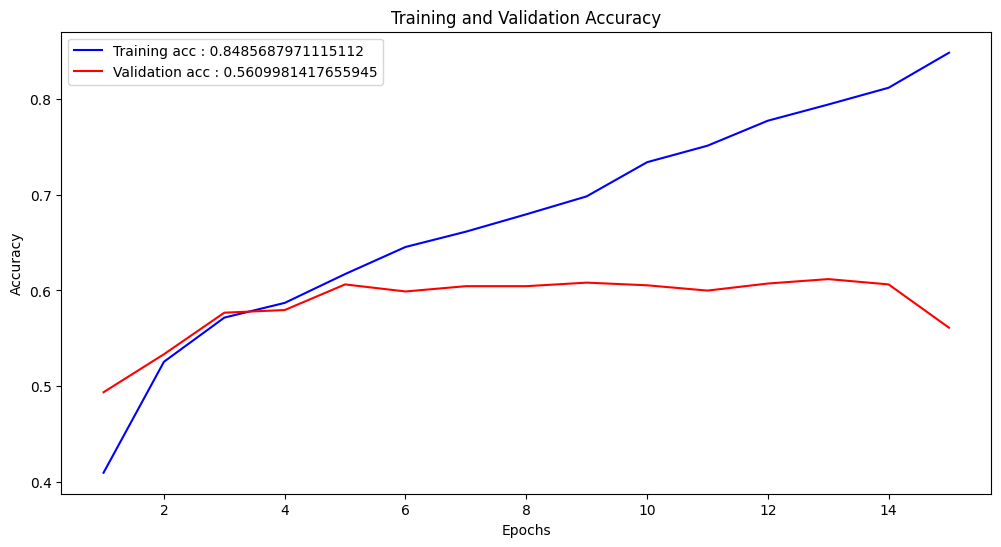

In [74]:
plotAccuraccy(cnn_model_LM_DAG_history)

* Just like the previous model with lung masks data we are getting the same results , we are getting the overfitted model with very poor accuracy.

In [75]:
y_true_LM_DAG = test_LM_dataset.labels

In [76]:
predictions_LM_DAG = cnn_model.predict(test_LM_dataset)
predicted_classes_LM_DAG = np.argmax(predictions_LM_DAG, axis=1)

22/22 [==============================] - 1s 29ms/step


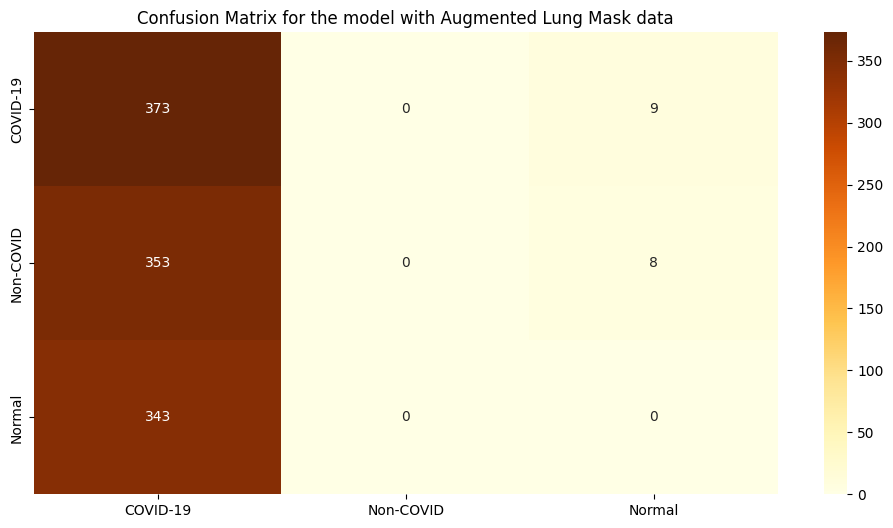

In [77]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix_DAG_LM = confusion_matrix(y_true_LM_DAG, predicted_classes_LM_DAG)

sns.heatmap(conf_matrix_DAG_LM, annot=True, fmt='.0f', cmap="YlOrBr", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix for the model with Augmented Lung Mask data')
plt.show()

* From the above confusion matrix, we can see that the COVID-19 class has high TP values and rest of the class has the high FN values.

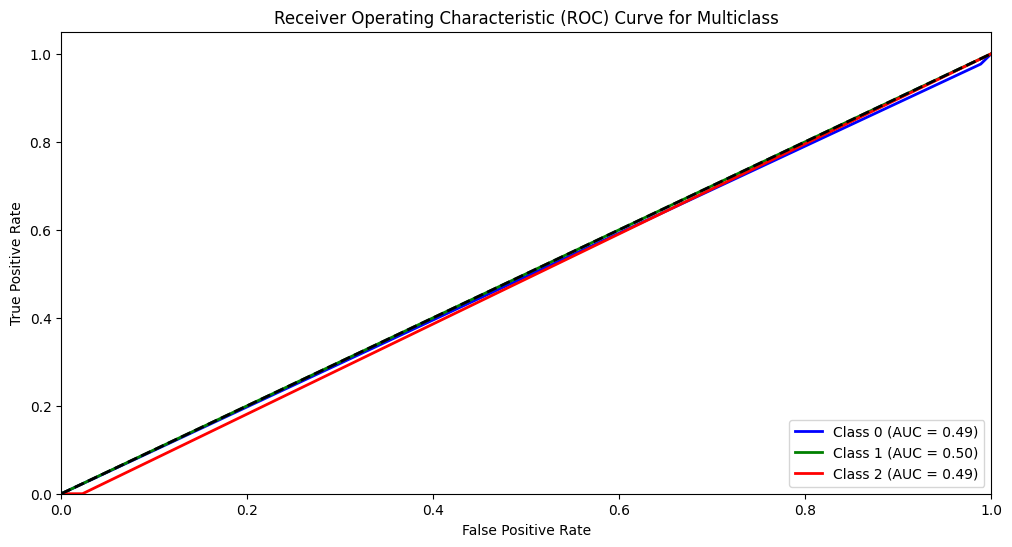

In [78]:
plotROC_AUC(y_true_LM_DAG, predicted_classes_LM_DAG)

* The model with lung mask data with augmented data is underfitting and it is not at all classifiying having the 0.5 AUC-ROC curve.

## **Model Tuning**

* We are taking the model that has given the good accuracy which is cnn_model_DAG a CNN model with the input as augmented data.
* To overcome overfitting, we will apply the DropOut and regularization to see if the model accuracy improves or not.

In [80]:
cnn_reg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l2=0.01)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
cnn_reg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       18560     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 64)        

In [81]:
cnn_reg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
cnn_reg_model_history = cnn_reg_model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=30,
                 )

Epoch 1/30
65/65 [==============================] - 12s 142ms/step - loss: 4.2488 - accuracy: 0.3450 - val_loss: 3.4035 - val_accuracy: 0.3512
Epoch 2/30
65/65 [==============================] - 9s 142ms/step - loss: 2.7797 - accuracy: 0.3583 - val_loss: 2.2285 - val_accuracy: 0.3512
Epoch 3/30
65/65 [==============================] - 8s 131ms/step - loss: 1.8163 - accuracy: 0.4340 - val_loss: 1.4988 - val_accuracy: 0.5000
Epoch 4/30
65/65 [==============================] - 9s 135ms/step - loss: 1.2781 - accuracy: 0.4801 - val_loss: 1.1505 - val_accuracy: 0.5536
Epoch 5/30
65/65 [==============================] - 9s 134ms/step - loss: 1.0661 - accuracy: 0.5682 - val_loss: 1.0105 - val_accuracy: 0.5739
Epoch 6/30
65/65 [==============================] - 8s 127ms/step - loss: 0.9623 - accuracy: 0.5851 - val_loss: 0.9523 - val_accuracy: 0.5712
Epoch 7/30
65/65 [==============================] - 8s 129ms/step - loss: 0.9068 - accuracy: 0.5999 - val_loss: 0.9243 - val_accuracy: 0.6128
Epoch

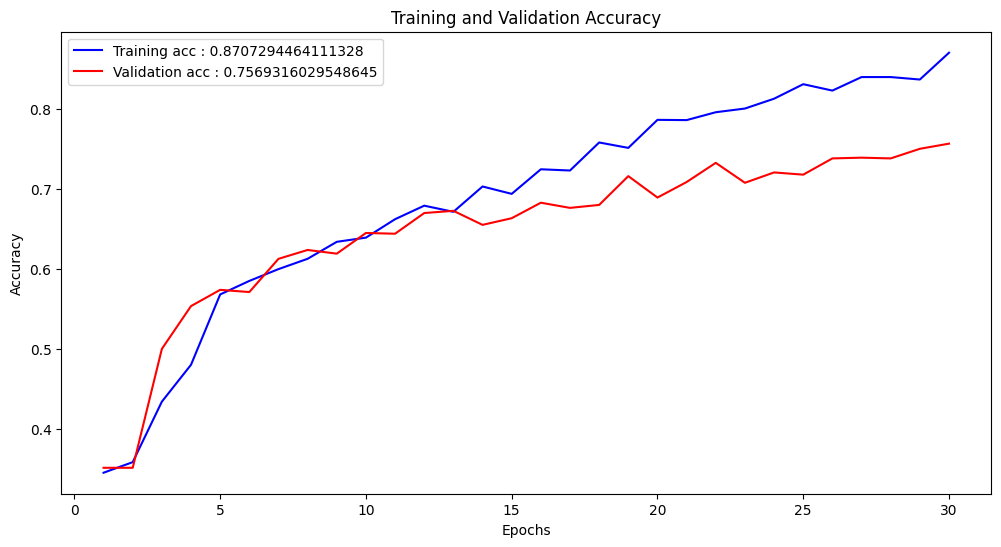

In [83]:
plotAccuraccy(cnn_reg_model_history)

* From the above plot, we can see that with the increase of epohs the model accuracy increases and it is close to 87% accuracy.

In [84]:
y_true_reg = test_dataset.labels

In [85]:
predictions_reg = cnn_reg_model.predict(test_dataset)
predicted_classes_reg = np.argmax(predictions_reg, axis=1)

22/22 [==============================] - 2s 84ms/step


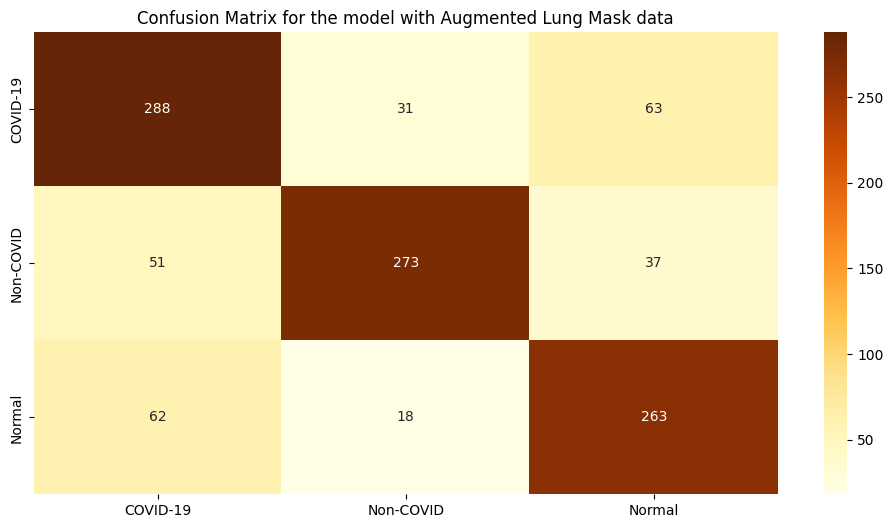

In [86]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix_reg = confusion_matrix(y_true_reg, predicted_classes_reg)

sns.heatmap(conf_matrix_reg, annot=True, fmt='.0f', cmap="YlOrBr", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix for the model with Augmented Lung Mask data')
plt.show()

* From the above confusion matrix, we can see that the predicted classes have the high number of TRUE POSITIVE vlaues for all the classes and have the low number of FALSE POSITIVE, False Negative and True negetives.

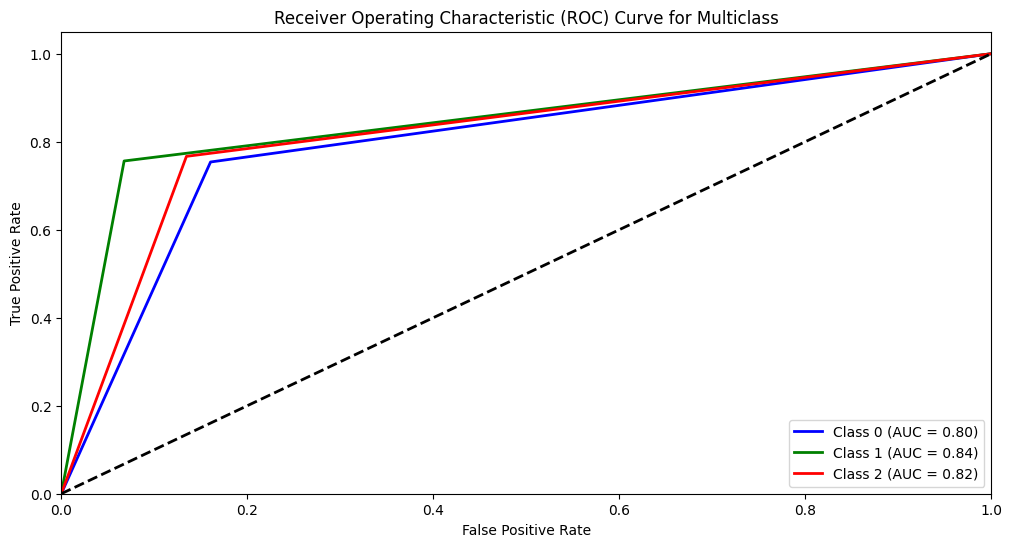

In [87]:
plotROC_AUC(y_true_reg,predicted_classes_reg)

* Tuning the model haven't improved the accuracy of the model which is 87% but the AUC-ROC curve has the good percentage of True Positive vlaues with 0.80 values for all the classes.

Let's use VGG16 pre-trained model to train,predict and fine tune the model.

In [97]:
train_datagenerator = ImageDataGenerator(rescale=1/255)
valid_datagenerator = ImageDataGenerator(rescale=1/255)
test_datagenerator = ImageDataGenerator(rescale=1/255)

vgg_train_dataset = train_datagenerator.flow_from_directory(trainPathLM,
                                                  target_size=(32, 32),
                                                  color_mode='rgb', 
                                                  class_mode='sparse', 
                                                  batch_size=50,
                                                  )

vgg_test_dataset = test_datagenerator.flow_from_directory(testPathLM,
                                                target_size=(32, 32),
                                                class_mode='sparse',
                                                color_mode='rgb',
                                                batch_size=50,
                                                shuffle=False
                                                )

vgg_valid_dataset = valid_datagenerator.flow_from_directory(valPathLM,
                                                  target_size=(32, 32),
                                                  class_mode='sparse',
                                                  batch_size=50,
                                                  color_mode='rgb',
                                                  )

Found 3249 images belonging to 3 classes.
Found 1086 images belonging to 3 classes.
Found 1082 images belonging to 3 classes.


In [98]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [99]:
# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [100]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()

In [101]:
# Define new fine-tuned model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

In [102]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [103]:
# Compile the model
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
# Train the model
vgg_model.fit(vgg_train_dataset,
          steps_per_epoch=len(vgg_train_dataset),
          epochs=20,
          validation_data=vgg_valid_dataset,
          validation_steps=len(vgg_valid_dataset))

Epoch 1/20
65/65 [==============================] - 11s 160ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.9833 - accuracy: 0.5122 - val_loss: 0.9673 - val_accuracy: 0.4963
Epoch 2/20
65/65 [==============================] - 11s 165ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.8940 - accuracy: 0.5682 - val_loss: 0.9331 - val_accuracy: 0.5462
Epoch 3/20
65/65 [==============================] - 11s 164ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.8701 - accuracy: 0.5916 - val_loss: 0.8893 - val_accuracy: 0.5693
Epoch 4/20
65/65 [==============================] - 11s 168ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.8671 - accuracy: 0.5897 - val_loss: 0.8878 - val_accuracy: 0.5813
Epoch 5/20
65/65 [==============================] - 11s 175ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.8340 - accuracy: 0.6100 - val_loss: 0.8784 - val_accuracy: 0.5582
Epoch 6/20
65/65 [==============================] - 11s 164ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.8213 - acc

In [105]:
# Unfreezing some of the layers in the vgg model for fine-tuning
for layer in base_model.layers[:15]:
    layer.trainable = True

In [106]:
# Recompile the model with the new optimizer
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
# Continuing to train the model with fine-tuning
vgg_history = vgg_model.fit(vgg_train_dataset,
                steps_per_epoch=len(vgg_train_dataset),
                epochs=20,
                validation_data=vgg_valid_dataset,
                validation_steps=len(vgg_valid_dataset))

Epoch 1/20
65/65 [==============================] - 64s 967ms/step - batch: 32.0000 - size: 49.9846 - loss: 1.6480 - accuracy: 0.3278 - val_loss: 1.1033 - val_accuracy: 0.3327
Epoch 2/20
65/65 [==============================] - 64s 982ms/step - batch: 32.0000 - size: 49.9846 - loss: 1.1073 - accuracy: 0.3493 - val_loss: 1.0733 - val_accuracy: 0.3521
Epoch 3/20
65/65 [==============================] - 65s 995ms/step - batch: 32.0000 - size: 49.9846 - loss: 1.0976 - accuracy: 0.3601 - val_loss: 1.1221 - val_accuracy: 0.3327
Epoch 4/20
65/65 [==============================] - 67s 1s/step - batch: 32.0000 - size: 49.9846 - loss: 1.0421 - accuracy: 0.4408 - val_loss: 1.0165 - val_accuracy: 0.5092
Epoch 5/20
65/65 [==============================] - 63s 962ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.9860 - accuracy: 0.4986 - val_loss: 0.9728 - val_accuracy: 0.5240
Epoch 6/20
65/65 [==============================] - 63s 970ms/step - batch: 32.0000 - size: 49.9846 - loss: 0.9642 - accura

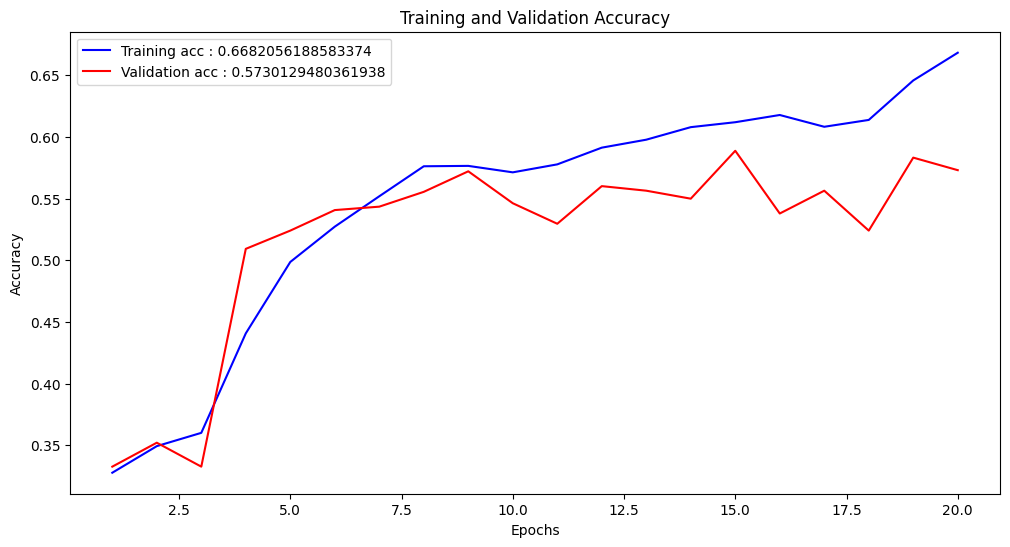

In [108]:
plotAccuraccy(vgg_history)

* Here from the above plot, we can see that the there is a constant increase in accuracy between training and validation dataset and it might perform better than our custom model if we increase and train the model with more number of epochs.

In [109]:
y_true_vgg = vgg_test_dataset.labels

In [110]:
predictions_vgg = vgg_model.predict(vgg_test_dataset)
predicted_classes_vgg = np.argmax(predictions_vgg, axis=1)

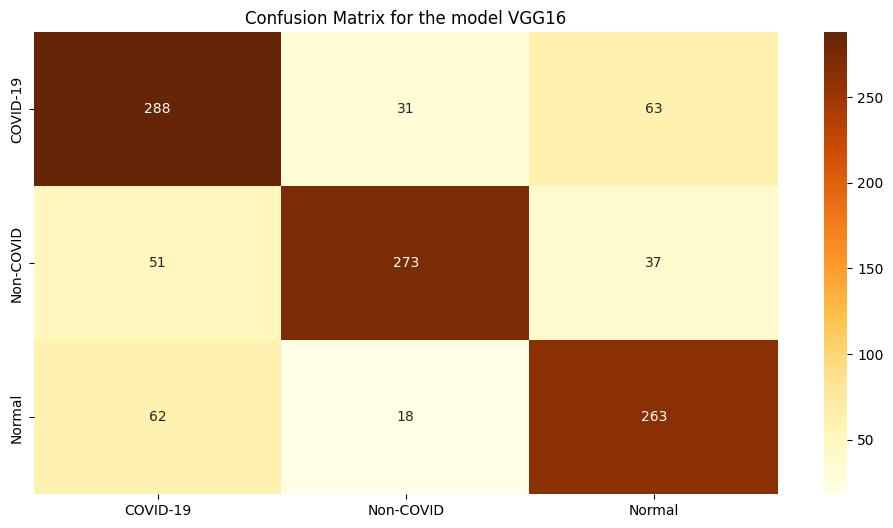

In [111]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix_vgg = confusion_matrix(y_true_vgg, predicted_classes_vgg)

sns.heatmap(conf_matrix_reg, annot=True, fmt='.0f', cmap="YlOrBr", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix for the model VGG16')
plt.show()

* Just like the previously trained model with regularaization and dropout layers, the confusion matrix from the above plot also has the good number of TP values.

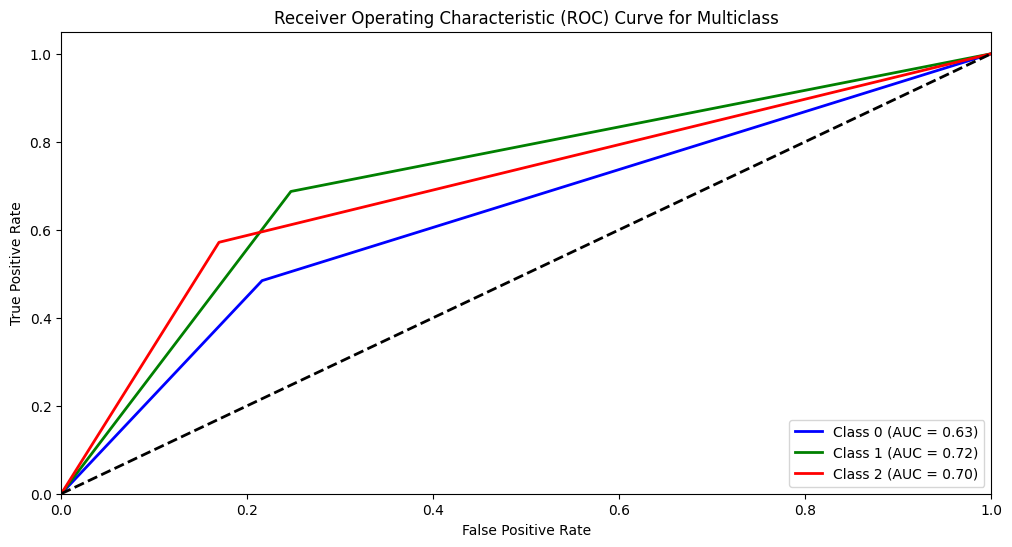

In [112]:
plotROC_AUC(y_true_vgg, predicted_classes_vgg)

* The AUC-ROC curve has the good number of TP values having 0.63 for all the classes.

## **Model Interoperability**

  0%|          | 0/200 [00:00<?, ?it/s]

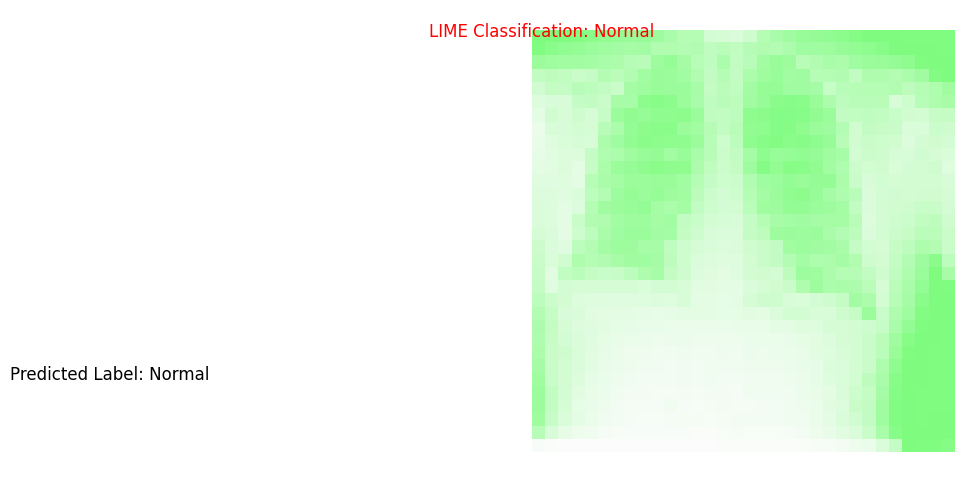

In [114]:
# Loading the test image and resizing it to fit in cnn_model
test_image = load_img(random_test_image, target_size=(32, 32))
# Convert to numpy array and normalize
test_image = img_to_array(test_image) / 255.0


# Define predict function for LIME explainer
def prediction_fn(images):
    return vgg_model.predict(images)

#LimeImageExplainer is  an instance of the LIME responsible for generating explaination for image being classified
explainer = lime_image.LimeImageExplainer()
#creating instance of explainer with this feature to classify the prediction.
'''
test_image = is the image we are passing in.
prediction_fn =  is the cnn_model to predict.
top_labels is to explain the  predicted label and  is 1 to predict the top predicted label.
hide_color is None beacuse we have grey scale image
num_samples is number of samples  to generate when approximating the decision boundaries around the instance
'''
explanation = explainer.explain_instance(test_image, prediction_fn, top_labels=1, hide_color=None, num_samples=200)

# calculating the predicted label and probabilities so that
predicted_probabilities = vgg_model.predict(test_image[np.newaxis, ...])[0]
predicted_label_index = np.argmax(predicted_probabilities)
predicted_label = categories[predicted_label_index]

#this method returns both the highlighted image and a mask indicating the important regions.
temp, mask = explanation.get_image_and_mask(predicted_label_index, positive_only=False, num_features=5, hide_rest=False)

# Plot the predicted label and explanation side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted label
axes[0].text(0.2, 0.2, f"Predicted Label: {predicted_label}", fontsize=12, ha='center')
axes[0].axis('off')

# Plot LIME explanation with Lime classification boundary colored differently
lime_classified_image = mark_boundaries(temp / 2 + 0.5, mask, outline_color=(1, 1, 0))
axes[1].imshow(lime_classified_image)
axes[1].text(0.2, 0.02, f"LIME Classification: {predicted_label}", fontsize=12, ha='center', color='red')
axes[1].axis('off')

plt.show()


* To check the model interoperability, we have used the LIME module which takes the image and predict function as inputs.
* Explainable AI using get_image_and_mask has returned image with the corresponding mask represents the features in the image responsible for the prediction.
* For model interoperability we have used the fine tuned pretrained model VGG16.

## **Results and Conclusions**
### **Image Analysis**
* We have verified that all the labels, x-ray images and mask images are in correct number of not.
* Caluclated the total number of images of all classes.
* Verified the pixel range of randomly picked images.
### **Data Preprocessing**
* In Data preprocessing, we have used the guassian blur, histogram equilization and contrast threshold adjustment, but the quality of the image is getting worse and which is not viable for model training.
* We have used data augmentation for the X-ray images and lung masks images to train the model.
### **Model Building**
* We have built CNN model for classification using x-ray data , x-ray data augmentation, lung masks data and lung masks data augmentation.
* Among all the models, x-ray data augmentation data model has good performance which has high accuracy of 90% but has high TP values for COVID-19 class and high FN values for Non-COVID-19 class and Normal class.
* Models with lung mask data as input are not perfoming well with the data augmentation and without the data augmentation.
* So, we have not combined both the models accuracy and performance with x-ray data augmentation model.
### **Fune-Tuning**
* With Dropout and L1,L2 regularization techniques, we have achived the good performance with x-ray data augmentation data as input and it has the accuracy of 87%.
* ROC-AUC values for the tuned model is around 0.8 for all the classes.
* VGG16 pretained model is givng the good results and has the capability of imporvement of accuracy if we train the model for more number of epochs.
### **Model Interopability**
* We have used LIME module to find the model interopability and using this we can tell the what are the features that are helpful in predicting the image to the specified class.
* Form the above image, we can see that the highlighed regions in the images are the important features which are helpful in classifying the image to the specified class.